In [1]:
from keras import layers
from keras import models

Using TensorFlow backend.


ImportError: Traceback (most recent call last):
  File "/usr/local/lib/python2.7/dist-packages/tensorflow/python/pywrap_tensorflow.py", line 58, in <module>
    from tensorflow.python.pywrap_tensorflow_internal import *
  File "/usr/local/lib/python2.7/dist-packages/tensorflow/python/pywrap_tensorflow_internal.py", line 28, in <module>
    _pywrap_tensorflow_internal = swig_import_helper()
  File "/usr/local/lib/python2.7/dist-packages/tensorflow/python/pywrap_tensorflow_internal.py", line 24, in swig_import_helper
    _mod = imp.load_module('_pywrap_tensorflow_internal', fp, pathname, description)
ImportError: libnvidia-fatbinaryloader.so.410.129: cannot open shared object file: No such file or directory


Failed to load the native TensorFlow runtime.

See https://www.tensorflow.org/install/install_sources#common_installation_problems

for some common reasons and solutions.  Include the entire stack trace
above this error message when asking for help.

In [5]:
import os
os.getcwd()

'/home/alcd/Big data Programming'

In [ ]:
import os, shutil

original_dataset_dir = '/Users/fchollet/Downloads/kaggle_original_data'

base_dir = '/Users/fchollet/Downloads/cats_and_dogs_small'
os.mkdir(base_dir)

# making folders to store each split

train_dir = os.path.join(base_dir, 'train')
os.mkdir(train_dir)

validation_dir = os.path.join(base_dir, 'validation')
os.mkdir(validation_dir)

test_dir = os.path.join(base_dir, 'test')
os.mkdir(test_dir)

train_cats_dir = os.path.join(train_dir, 'cats')
os.mkdir(train_cats_dir)

train_dogs_dir = os.path.join(train_dir, 'dogs')
os.mkdir(train_dogs_dir)

validation_cats_dir = os.path.join(validation_dir, 'cats')
os.mkdir(validation_cats_dir)

validation_dogs_dir = os.path.join(validation_dir, 'dogs')
os.mkdir(validation_dogs_dir)

test_cats_dir = os.path.join(test_dir, 'cats')
os.mkdir(test_cats_dir)

test_dogs_dir = os.path.join(test_dir, 'dogs')
os.mkdir(test_dogs_dir)

fnames = ['cat.{}.jpg'.format(i) for i in range(1000)]
for fname in fnames:
src = os.path.join(original_dataset_dir, fname)
dst = os.path.join(train_cats_dir, fname)
shutil.copyfile(src, dst)
fnames = ['cat.{}.jpg'.format(i) for i in range(1000, 1500)]
for fname in fnames:
src = os.path.join(original_dataset_dir, fname)
dst = os.path.join(validation_cats_dir, fname)
shutil.copyfile(src, dst)
fnames = ['cat.{}.jpg'.format(i) for i in range(1500, 2000)]
for fname in fnames:
src = os.path.join(original_dataset_dir, fname)
dst = os.path.join(test_cats_dir, fname)
shutil.copyfile(src, dst)

In [1]:
from keras import layers
from keras import models
from keras.preprocessing.image import ImageDataGenerator

train_dir = 'splits/train' #provide the path 
validation_dir = 'splits/validation' #provide the path 
test_dir = 'splits/test' #provide the path 

train_datagen= ImageDataGenerator(rescale=1./255)
test_datagen= ImageDataGenerator(rescale=1./255)

train_generator= train_datagen.flow_from_directory(
                                                    train_dir,
                                                    target_size=(150, 150),
                                                    batch_size=20,
                                                    class_mode='binary'
                                                    )
validation_generator= test_datagen.flow_from_directory(
                                                    validation_dir,
                                                    target_size=(150, 150),
                                                    batch_size=20,
                                                    class_mode='binary'
                                                    )

Using TensorFlow backend.


Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [61]:
for data_batch, labels_batch in train_generator:
    print('data batch shape:', data_batch.shape)
    print('labels batch shape:', labels_batch.shape)
    break


('data batch shape:', (20, 150, 150, 3))
('labels batch shape:', (20,))


In [2]:
my_model = models.Sequential()
my_model.add(layers.Conv2D(32, (3, 3), activation='relu',input_shape=(150, 150, 3)))
my_model.add(layers.MaxPooling2D((2, 2)))
my_model.add(layers.Conv2D(64, (3, 3), activation='relu'))
my_model.add(layers.MaxPooling2D((2, 2)))
my_model.add(layers.Conv2D(128, (3, 3), activation='relu'))
my_model.add(layers.MaxPooling2D((2, 2)))
my_model.add(layers.Conv2D(128, (3, 3), activation='relu'))
my_model.add(layers.MaxPooling2D((2, 2)))
my_model.add(layers.Flatten())
my_model.add(layers.Dense(512, activation='relu'))
my_model.add(layers.Dense(1, activation='sigmoid'))

In [4]:
from keras import optimizers

my_model.compile(loss='binary_crossentropy',
                optimizer=optimizers.RMSprop(lr=1e-4),
                metrics=['acc'])

In [5]:
my_history = my_model.fit_generator(
                        train_generator,
                        steps_per_epoch=100,
                        epochs=30,
                        validation_data=validation_generator,
                        validation_steps=50)

Epoch 1/30
100/100 [==============================] - 13s 132ms/step - loss: 0.6898 - acc: 0.5340 - val_loss: 0.6801 - val_acc: 0.5560
Epoch 2/30
100/100 [==============================] - 5s 53ms/step - loss: 0.6515 - acc: 0.6150 - val_loss: 0.6345 - val_acc: 0.6240
Epoch 3/30
100/100 [==============================] - 5s 54ms/step - loss: 0.6028 - acc: 0.6670 - val_loss: 0.6138 - val_acc: 0.6500
Epoch 4/30
100/100 [==============================] - 6s 57ms/step - loss: 0.5709 - acc: 0.6885 - val_loss: 0.6543 - val_acc: 0.6270
Epoch 5/30
100/100 [==============================] - 5s 49ms/step - loss: 0.5333 - acc: 0.7240 - val_loss: 0.5931 - val_acc: 0.6760
Epoch 6/30
100/100 [==============================] - 5s 48ms/step - loss: 0.5004 - acc: 0.7580 - val_loss: 0.5743 - val_acc: 0.6930
Epoch 7/30
100/100 [==============================] - 4s 45ms/step - loss: 0.4760 - acc: 0.7735 - val_loss: 0.5793 - val_acc: 0.6960
Epoch 8/30
100/100 [==============================] - 5s 54ms/step 

In [ ]:
# to save the model and the model weights
my_model.save('cats_and_dogs_small_1.h5')


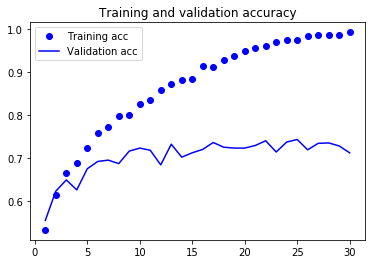

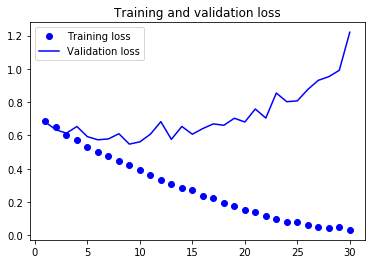

In [7]:
import matplotlib.pyplot as plt

acc= my_history.history['acc']
val_acc= my_history.history['val_acc']
loss = my_history.history['loss']
val_loss= my_history.history['val_loss']
epochs = range(1, len(acc) + 1)
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

In [20]:
# performing data augmentation

train_datagen= ImageDataGenerator(
                                    rescale=1./255,
                                    rotation_range=40,
                                    width_shift_range=0.2,
                                    height_shift_range=0.2,
                                    shear_range=0.2,
                                    zoom_range=0.2,
                                    horizontal_flip=True)
test_datagen= ImageDataGenerator(rescale=1./255)
train_generator= train_datagen.flow_from_directory(
                                                    train_dir,
                                                    target_size=(150, 150),
                                                    batch_size=32,
                                                    class_mode='binary')
validation_generator= test_datagen.flow_from_directory(
                                                    validation_dir,
                                                    target_size=(150, 150),
                                                    batch_size=32,
                                                    class_mode='binary')

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [8]:
augmented_model = models.Sequential()
augmented_model.add(layers.Conv2D(32, (3, 3), activation='relu',input_shape=(150, 150, 3)))
augmented_model.add(layers.MaxPooling2D((2, 2)))
augmented_model.add(layers.Conv2D(64, (3, 3), activation='relu'))
augmented_model.add(layers.MaxPooling2D((2, 2)))
augmented_model.add(layers.Conv2D(128, (3, 3), activation='relu'))
augmented_model.add(layers.MaxPooling2D((2, 2)))
augmented_model.add(layers.Conv2D(128, (3, 3), activation='relu'))
augmented_model.add(layers.MaxPooling2D((2, 2)))
augmented_model.add(layers.Flatten())
augmented_model.add(layers.Dropout(0.5))
augmented_model.add(layers.Dense(512, activation='relu'))
augmented_model.add(layers.Dense(1, activation='sigmoid'))

augmented_model.compile(loss='binary_crossentropy',
                optimizer=optimizers.RMSprop(lr=1e-4),
                metrics=['acc'])

In [22]:
augmented_history = augmented_model.fit_generator(
                            train_generator,
                            steps_per_epoch=100,
                            epochs=100,
                            validation_data=validation_generator,
                            validation_steps=50)

Epoch 1/100
100/100 [==============================] - 26s 263ms/step - loss: 0.6912 - acc: 0.5209 - val_loss: 0.6795 - val_acc: 0.5704
Epoch 2/100
100/100 [==============================] - 24s 244ms/step - loss: 0.6781 - acc: 0.5647 - val_loss: 0.6526 - val_acc: 0.5934
Epoch 3/100
100/100 [==============================] - 20s 202ms/step - loss: 0.6648 - acc: 0.5863 - val_loss: 0.6935 - val_acc: 0.5387
Epoch 4/100
100/100 [==============================] - 20s 197ms/step - loss: 0.6503 - acc: 0.6031 - val_loss: 0.6980 - val_acc: 0.5393
Epoch 5/100
100/100 [==============================] - 24s 241ms/step - loss: 0.6319 - acc: 0.6406 - val_loss: 0.6104 - val_acc: 0.6739
Epoch 6/100
100/100 [==============================] - 25s 246ms/step - loss: 0.6242 - acc: 0.6519 - val_loss: 0.5897 - val_acc: 0.6907
Epoch 7/100
100/100 [==============================] - 20s 201ms/step - loss: 0.6078 - acc: 0.6666 - val_loss: 0.5833 - val_acc: 0.6764
Epoch 8/100
100/100 [===========================

In [23]:
# saving and reading a model

augmented_model.save('cats_and_dogs_small_2.h5')


from keras.models import load_model

loaded_model = load_model('cats_and_dogs_small_2.h5')
print(loaded_model.summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_5 (Conv2D)            (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 15, 15, 128)       147584    
__________

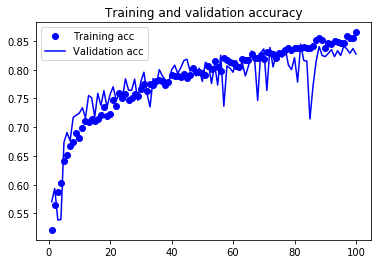

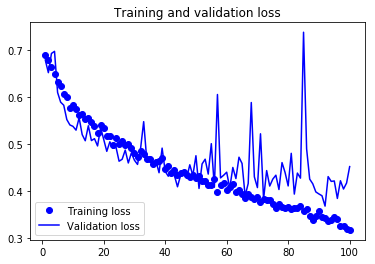

In [24]:
import matplotlib.pyplot as plt
acc= augmented_history.history['acc']
val_acc= augmented_history.history['val_acc']
loss = augmented_history.history['loss']
val_loss= augmented_history.history['val_loss']
epochs = range(1, len(acc) + 1)
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

In [ ]:
# Pretrained model

In [27]:
from keras.applications import VGG16

conv_base= VGG16(weights='imagenet',
                    include_top=False,
                    input_shape=(150, 150, 3))

58900480/58889256 [==============================] - 4s 0us/step


In [28]:
conv_base.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 150, 150, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 150, 150, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 150, 150, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 75, 75, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 75, 75, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 75, 75, 128)       147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 37, 37, 128)       0         
__________

In [37]:
# using pretrained model to extract features

import numpy as np

datagen = ImageDataGenerator(rescale=1./255)
batch_size = 20

def extract_features(directory, sample_count):
    features = np.zeros(shape=(sample_count, 4, 4, 512))
    labels = np.zeros(shape=(sample_count))
    generator = datagen.flow_from_directory(
                                            directory,
                                            target_size=(150, 150),
                                            batch_size=batch_size,
                                            class_mode='binary')
    i = 0
    for inputs_batch, labels_batch in generator:
        features_batch= conv_base.predict(inputs_batch)
        features[i * batch_size: (i + 1) * batch_size] = features_batch
        labels[i * batch_size: (i + 1) * batch_size] = labels_batch
        i += 1
        if i * batch_size>= sample_count:
            break                # extracting features only once
    return features, labels

train_features, train_labels= extract_features(train_dir, 2000)
validation_features, validation_labels= extract_features(validation_dir, 1000)
test_features, test_labels= extract_features(test_dir, 1000)

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [39]:
# reshaping the features to be input to the dense layers

train_features = np.reshape(train_features, (2000, 4 * 4 * 512))
validation_features = np.reshape(validation_features, (1000, 4 * 4 * 512))
test_features = np.reshape(test_features, (1000, 4 * 4 * 512))

In [40]:
# Building a classifier 

classifier_model = models.Sequential()
classifier_model.add(layers.Dense(256, activation='relu', input_dim= 4 * 4 * 512))
classifier_model.add(layers.Dropout(0.5))
classifier_model.add(layers.Dense(1, activation='sigmoid'))
classifier_model.compile(optimizer=optimizers.RMSprop(lr=2e-5),
                        loss='binary_crossentropy',
                        metrics=['acc'])
classifier_history = classifier_model.fit(train_features, train_labels,
                                            epochs=30,
                                            batch_size=20,
                                            validation_data=(validation_features, validation_labels))

Train on 2000 samples, validate on 1000 samples
Epoch 1/30
2000/2000 [==============================] - 1s 550us/step - loss: 0.5933 - acc: 0.6775 - val_loss: 0.4364 - val_acc: 0.8290
Epoch 2/30
2000/2000 [==============================] - 0s 236us/step - loss: 0.4262 - acc: 0.8165 - val_loss: 0.3565 - val_acc: 0.8590
Epoch 3/30
2000/2000 [==============================] - 1s 257us/step - loss: 0.3513 - acc: 0.8455 - val_loss: 0.3191 - val_acc: 0.8810
Epoch 4/30
2000/2000 [==============================] - 1s 278us/step - loss: 0.3152 - acc: 0.8695 - val_loss: 0.2943 - val_acc: 0.8870
Epoch 5/30
2000/2000 [==============================] - 1s 276us/step - loss: 0.2887 - acc: 0.8855 - val_loss: 0.2832 - val_acc: 0.8900
Epoch 6/30
2000/2000 [==============================] - 1s 270us/step - loss: 0.2612 - acc: 0.9000 - val_loss: 0.2683 - val_acc: 0.8940
Epoch 7/30
2000/2000 [==============================] - 1s 267us/step - loss: 0.2462 - acc: 0.9045 - val_loss: 0.2619 - val_acc: 0.9010


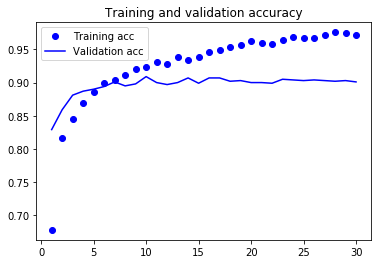

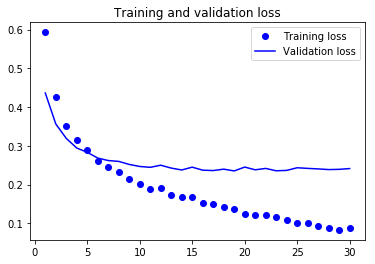

In [41]:
import matplotlib.pyplot as plt
acc = classifier_history.history['acc']
val_acc = classifier_history.history['val_acc']
loss = classifier_history.history['loss']
val_loss = classifier_history.history['val_loss']
epochs = range(1, len(acc) + 1)
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

In [42]:
# With Data Augmentation

pre_model = models.Sequential()
pre_model.add(conv_base)
pre_model.add(layers.Flatten())
pre_model.add(layers.Dense(256, activation='relu'))
pre_model.add(layers.Dense(1, activation='sigmoid'))

conv_base.trainable = False        # prevent weight updates

In [43]:
train_datagen = ImageDataGenerator(
                                    rescale=1./255,
                                    rotation_range=40,
                                    width_shift_range=0.2,
                                    height_shift_range=0.2,
                                    shear_range=0.2,
                                    zoom_range=0.2,
                                    horizontal_flip=True,
                                    fill_mode='nearest')
test_datagen = ImageDataGenerator(rescale=1./255)
train_generator = train_datagen.flow_from_directory(
                                                    train_dir,
                                                    target_size=(150, 150),
                                                    batch_size=20,
                                                    class_mode='binary')
validation_generator = test_datagen.flow_from_directory(
                                                        validation_dir,
                                                        target_size=(150, 150),
                                                        batch_size=20,
                                                        class_mode='binary')
pre_model.compile(loss='binary_crossentropy',
                optimizer=optimizers.RMSprop(lr=2e-5),
                metrics=['acc'])
pre_history = pre_model.fit_generator(
                            train_generator,
                            steps_per_epoch=100,
                            epochs=30,
                            validation_data=validation_generator,
                            validation_steps=50)

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.
Epoch 1/30
100/100 [==============================] - 14s 142ms/step - loss: 0.6089 - acc: 0.6825 - val_loss: 0.4694 - val_acc: 0.8160
Epoch 2/30
100/100 [==============================] - 14s 138ms/step - loss: 0.4885 - acc: 0.7785 - val_loss: 0.3772 - val_acc: 0.8600
Epoch 3/30
100/100 [==============================] - 13s 128ms/step - loss: 0.4362 - acc: 0.7990 - val_loss: 0.3333 - val_acc: 0.8690
Epoch 4/30
100/100 [==============================] - 14s 137ms/step - loss: 0.3989 - acc: 0.8240 - val_loss: 0.3133 - val_acc: 0.8680
Epoch 5/30
100/100 [==============================] - 13s 132ms/step - loss: 0.3799 - acc: 0.8305 - val_loss: 0.3059 - val_acc: 0.8600
Epoch 6/30
100/100 [==============================] - 14s 145ms/step - loss: 0.3744 - acc: 0.8335 - val_loss: 0.2839 - val_acc: 0.8850
Epoch 7/30
100/100 [==============================] - 14s 143ms/step - loss: 0.3563 - acc: 0.8460 - val_lo

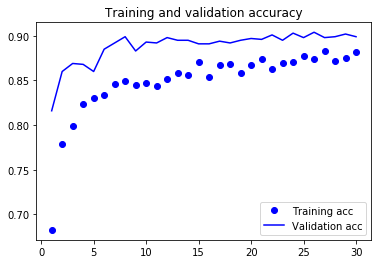

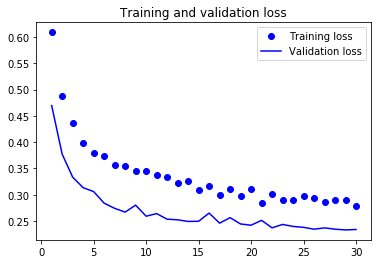

In [44]:

acc = pre_history.history['acc']
val_acc = pre_history.history['val_acc']
loss = pre_history.history['loss']
val_loss = pre_history.history['val_loss']
epochs = range(1, len(acc) + 1)
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

In [45]:
# fine tuning

conv_base.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 150, 150, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 150, 150, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 150, 150, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 75, 75, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 75, 75, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 75, 75, 128)       147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 37, 37, 128)       0         
__________

In [ ]:
conv_base.trainable = True
set_trainable = False

for layer in conv_base.layers:
    if layer.name == 'block5_conv1':
        set_trainable = True
    if set_trainable:
        layer.trainable = True
    else:
        layer.trainable = False

In [50]:
img_path = '5.jpg'
from keras.preprocessing import image
import numpy as np
img = image.load_img(img_path, target_size=(150, 150))
img_tensor = image.img_to_array(img)
img_tensor = np.expand_dims(img_tensor, axis=0)
img_tensor /= 255.
#<1> Its shape is (1, 150, 150, 3)
print(img_tensor.shape)

(1, 150, 150, 3)


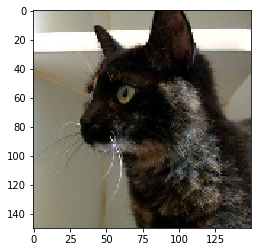

In [51]:
plt.imshow(img_tensor[0])
plt.show()

In [68]:
layer_outputs = [layer.output for layer in my_model.layers[:8]]
activation_model = models.Model(inputs=my_model.input, outputs=layer_outputs)

In [69]:
activations = activation_model.predict(img_tensor)

(1, 7, 7, 128)


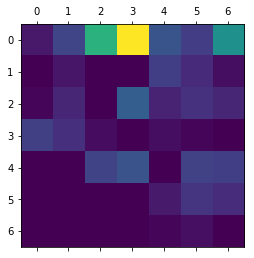

In [89]:
first_layer_activation = activations[0]
print(first_layer_activation.shape)
plt.matshow(first_layer_activation[0, :, :, 8], cmap='viridis')